## Set the pathes in the below command for tag --ds_path

In [8]:
!python ./lang_model/main.py -dt wiki --z_type normal --gpu_id 0 --batch_size 32 --embedding_size 256 --epochs 100 --preprocess true --ds_path ./wikitext-2

Namespace(batch_size=32, dataset='wiki', dropout=0.5, ds_path='./wikitext-2', embedding_size=256, epochs=100, gpu_id='0', hidden_size=256, layers=1, load=False, lr=0.0001, min_word_count=1, model_dir='', no_cuda=False, partial=False, partial_type='last75', preprocess='true', rnn_type='lstm', save=True, setting='standard', z_type='normal', zdim=32)
base_path= ./lang_model
./wikitext-2/wiki.valid.tokens ./lang_model/dataset/wiki/wiki_valid.txt
./wikitext-2/wiki.test.tokens ./lang_model/dataset/wiki/wiki_test.txt
./wikitext-2/wiki.train.tokens ./lang_model/dataset/wiki/wiki_train.txt
start to load Corpus data
start to build dictionary
start to make one-hot vectors
start to load Corpus data
start to build dictionary
start to make one-hot vectors
start to load Corpus data
start to build dictionary
start to make one-hot vectors
voca_dim=28853
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-

# Set the path to training loss log file

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


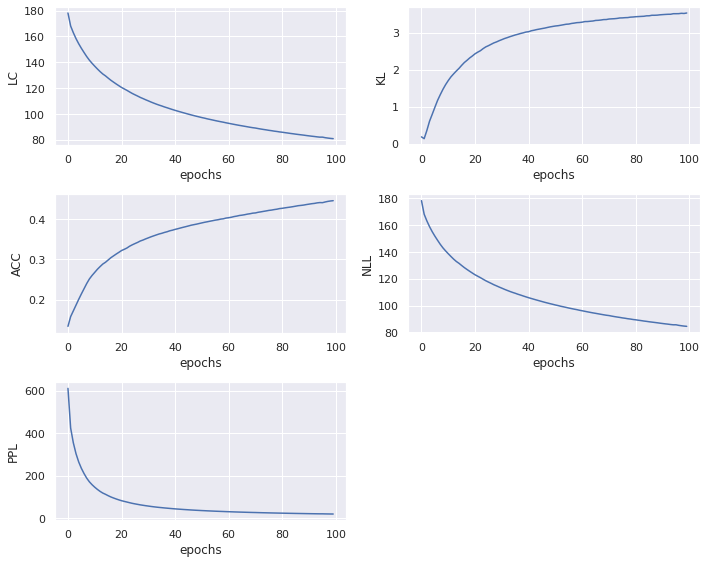

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.read_csv(
    './lang_model/wiki_model_save/TWRvae_loss.txt', sep='\t', 
    names=['id', 'LC', 'KL', 'ACC', 'NLL', 'PPL'],
    index_col='id'
)

sn.set_theme()
figsize = (10, 8)
cols = 2
rows = len(results_df.columns) // cols + 1
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)

def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

axs = trim_axs(axs, len(results_df.columns))
for ax, column_name in zip(axs, results_df.columns):
    ax.plot(results_df[column_name].values)
    ax.set_ylabel(str(column_name))
    ax.set_xlabel('epochs')

fig = plt.gcf()
fig.tight_layout()
fig.savefig('./results/metrics.png', dpi=100)